In [1]:
#installing kaggle library
! pip install kaggle

In [2]:
#configuring the path of kaggle .json file
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#importing dataset from kaggle
!kaggle competitions download -c dogs-vs-cats


 99% 806M/812M [00:09<00:00, 62.8MB/s]
100% 812M/812M [00:09<00:00, 90.1MB/s]


In [4]:
!ls #listing the files

 dogs-vs-cats.zip   kaggle.json  '~p'   sample_data


In [5]:
#extracting the compresssed file
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [6]:
#extracting the compresssed file
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [7]:
#counting number of files
import os
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print('numberof images',file_count)

numberof images 25000


printing name of images

In [8]:
file_name = os.listdir('/content/train')
print(file_name)

['cat.1953.jpg', 'dog.10579.jpg', 'dog.8628.jpg', 'cat.8093.jpg', 'cat.4780.jpg', 'dog.4675.jpg', 'dog.4733.jpg', 'dog.11132.jpg', 'dog.8344.jpg', 'cat.8488.jpg', 'cat.4494.jpg', 'cat.1059.jpg', 'dog.432.jpg', 'dog.3569.jpg', 'dog.10569.jpg', 'dog.5915.jpg', 'cat.6205.jpg', 'cat.10037.jpg', 'dog.2235.jpg', 'dog.5093.jpg', 'cat.1739.jpg', 'cat.10607.jpg', 'dog.7030.jpg', 'cat.6736.jpg', 'dog.8442.jpg', 'cat.11688.jpg', 'cat.2977.jpg', 'cat.4862.jpg', 'dog.6858.jpg', 'dog.3836.jpg', 'dog.8841.jpg', 'cat.600.jpg', 'dog.3011.jpg', 'dog.10689.jpg', 'dog.8424.jpg', 'dog.3881.jpg', 'dog.4974.jpg', 'cat.89.jpg', 'dog.10539.jpg', 'cat.10271.jpg', 'cat.2813.jpg', 'dog.3258.jpg', 'dog.7878.jpg', 'cat.11.jpg', 'dog.4833.jpg', 'cat.6781.jpg', 'dog.10061.jpg', 'cat.8971.jpg', 'cat.11643.jpg', 'cat.9362.jpg', 'dog.2798.jpg', 'cat.8666.jpg', 'dog.5130.jpg', 'cat.11269.jpg', 'cat.4776.jpg', 'dog.7903.jpg', 'cat.4336.jpg', 'cat.8544.jpg', 'dog.2965.jpg', 'dog.1359.jpg', 'dog.5221.jpg', 'dog.7822.jpg', '

importing dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

displaying images

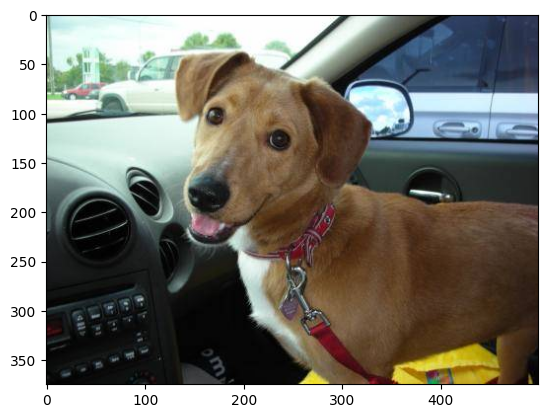

In [10]:
img = mpimg.imread('/content/train/dog.6648.jpg')
plt.imshow(img)


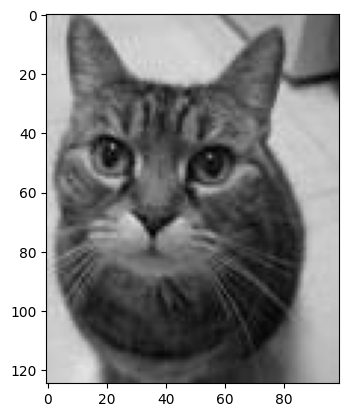

In [11]:
img = mpimg.imread('/content/train/cat.9595.jpg')
plt.imshow(img)


In [12]:
file_name = os.listdir('/content/train')
for i in range(5):
  name = file_name[i]
  print(name[0:3])


cat
dog
dog
cat
cat


In [13]:
#counting the number of images
file_name = os.listdir('/content/train')
dog_count = 0
cat_count = 0

for img_file in file_name:
  name = img_file[0:3]
  if name == 'dog':
    dog_count +=1
  else:
      cat_count +=1

print('number of dog_images',dog_count)
print('number of cat count',cat_count)



number of dog_images 12500
number of cat count 12500


resizing all images

In [14]:
#creating directory for resized images
os.mkdir('/content/image_resized')

In [15]:
#resizing and saving images
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):
  file_names = os.listdir(original_folder)[i]
  img_path = original_folder+file_names

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+file_names
  img.save(newImgPath)

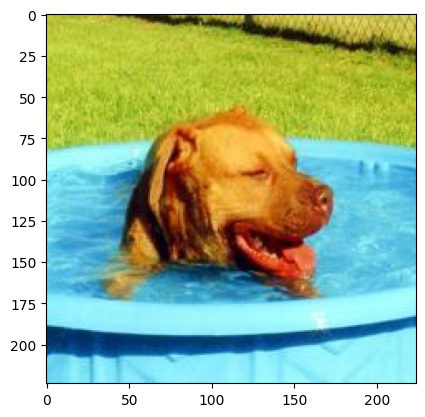

In [16]:
#resized dog image
img = mpimg.imread('/content/image_resized/dog.10336.jpg')
plt.imshow(img)


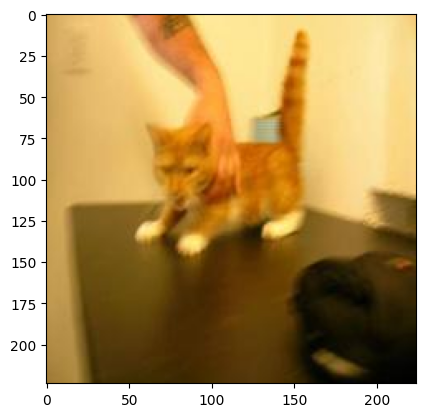

In [17]:
#resized cat image
img = mpimg.imread('/content/image_resized/cat.0.jpg')
plt.imshow(img)


creating labels

cat --> 0

dog --> 1

In [18]:
#creating a for loop for label
file_names = os.listdir('/content/image_resized/')

labels = []

for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)




In [19]:
print(labels[0:5])
print(len(file_names))

[0, 1, 1, 0, 0]
2000


In [21]:
#counting images of dog and cats out of 2000 images
import numpy as np
values,counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 958 1042]


converting all the resized images to numpy arrays

In [22]:
import cv2
import glob


In [24]:
image_directory = '/content/image_resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])



In [25]:
print(dof_cat_images)

[[[[168 152 136]
   [236 220 204]
   [162 146 130]
   ...
   [198 227 242]
   [196 225 239]
   [193 222 236]]

  [[170 154 138]
   [234 218 202]
   [165 149 133]
   ...
   [198 227 242]
   [196 225 239]
   [194 223 237]]

  [[165 150 134]
   [225 210 194]
   [169 154 138]
   ...
   [199 228 243]
   [197 226 240]
   [194 223 237]]

  ...

  [[133 151 162]
   [133 151 162]
   [132 149 162]
   ...
   [196 222 236]
   [189 215 229]
   [190 216 230]]

  [[132 150 161]
   [133 151 162]
   [135 152 165]
   ...
   [194 220 234]
   [187 213 227]
   [192 218 232]]

  [[140 158 169]
   [142 160 171]
   [142 159 172]
   ...
   [191 217 231]
   [184 210 224]
   [192 218 232]]]


 [[[251 250 254]
   [251 250 254]
   [251 250 254]
   ...
   [241 242 246]
   [244 245 249]
   [249 250 254]]

  [[251 250 254]
   [249 248 252]
   [248 247 251]
   ...
   [234 235 239]
   [240 241 245]
   [246 247 251]]

  [[251 250 254]
   [248 247 251]
   [245 244 248]
   ...
   [227 228 232]
   [238 239 243]
   [246 247

In [27]:
type(dog_cat_images)

numpy.ndarray

In [28]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [30]:
X = dog_cat_images
Y = np.asarray(labels)



train test split

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [33]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [34]:
#scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [35]:
print(X_train_scaled)

[[[[0.1372549  0.06666667 0.0627451 ]
   [0.15686275 0.08627451 0.08235294]
   [0.19607843 0.11764706 0.11372549]
   ...
   [0.33333333 0.23529412 0.01568627]
   [0.32941176 0.23921569 0.01960784]
   [0.32941176 0.23921569 0.01960784]]

  [[0.14901961 0.0745098  0.0627451 ]
   [0.15686275 0.08235294 0.07058824]
   [0.18431373 0.10196078 0.09411765]
   ...
   [0.33333333 0.23529412 0.01568627]
   [0.32941176 0.23921569 0.01960784]
   [0.32941176 0.23921569 0.01960784]]

  [[0.18823529 0.10980392 0.09019608]
   [0.18823529 0.10196078 0.08235294]
   [0.20392157 0.10980392 0.08627451]
   ...
   [0.33333333 0.23529412 0.01568627]
   [0.32941176 0.23921569 0.01960784]
   [0.32941176 0.23921569 0.01960784]]

  ...

  [[0.39607843 0.46666667 0.53333333]
   [0.39215686 0.4627451  0.52941176]
   [0.38823529 0.45882353 0.5254902 ]
   ...
   [0.47058824 0.3254902  0.23921569]
   [0.4745098  0.34117647 0.25098039]
   [0.48235294 0.34901961 0.25882353]]

  [[0.40784314 0.47843137 0.54509804]
   [0.4

building the nueral network

In [37]:
import tensorflow as tf
import tensorflow_hub as hub

In [44]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [45]:
num_of_classes = 2
model = tf.keras.Sequential([

        pretrained_model,
        tf.keras.layers.Dense(num_of_classes)

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [46]:
model.compile(

              optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['acc']
)

In [48]:
model.fit(X_train_scaled, Y_train, epochs=5)


Epoch 1/5
50/50 [==============================] - 78s 1s/step - loss: 0.2052 - acc: 0.9219
Epoch 2/5
50/50 [==============================] - 68s 1s/step - loss: 0.0653 - acc: 0.9787
Epoch 3/5
50/50 [==============================] - 70s 1s/step - loss: 0.0497 - acc: 0.9844
Epoch 4/5
50/50 [==============================] - 67s 1s/step - loss: 0.0424 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 67s 1s/step - loss: 0.0312 - acc: 0.9931


In [49]:
score,acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss=',score)
print('Test Accuracy=',acc)

13/13 [==============================] - 20s 2s/step - loss: 0.0508 - acc: 0.9825
Test Loss= 0.0508267842233181
Test Accuracy= 0.9825000166893005


predictive system


Path of the image to be predicted:/content/dog.jpg


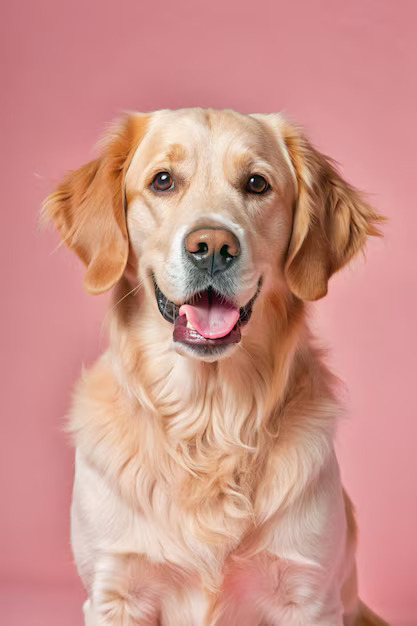

1/1 [==============================] - 0s 123ms/step
[[-2.6370544  4.596967 ]]
image is a dog


In [52]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:

  print(input_prediction)

  print('image is a cat')
else:
  print('image is a dog')

Path of the image to be predicted:/content/cat.jpg


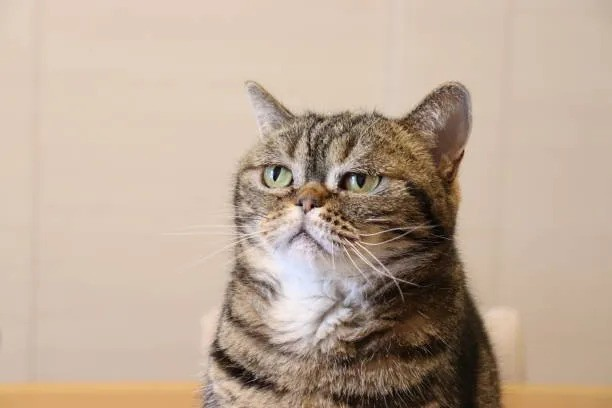

1/1 [==============================] - 0s 135ms/step
[[ 3.7721145 -2.9815116]]
[[ 3.7721145 -2.9815116]]
image is a cat


In [53]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:

  print(input_prediction)

  print('image is a cat')
else:
  print('image is a dog')

--end of scripts--